# GAN Generator Network

Default Loading

In [1]:
%load_ext autoreload
%load_ext tensorboard
%autoreload 2
import os
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
# from models.generator import Generator, GANTrainer
from models.neural_rendering import SurrogateVAE
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Loading pre-trained Surrogate

In [ ]:
from models.neural_rendering import RenderDataset, Evaluator, SurrogateVAE, Inference
from utils.train_utils import load_checkpoint

def full_path(relative_path):
    return os.path.join(base_path, relative_path)

if 'google.colab' in str(get_ipython()):
    base_path = '/content/drive/MyDrive/Master-Thesis'
else:
    base_path = ''

num_params = 77

rig_params_json_path = full_path('data/render_trainset/rendering_rig_params.json')
train_set_path = full_path('data/render_trainset')
idle_img_path = full_path('data/render_trainset/idle.png')
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SurrogateVAE(num_params=num_params)
model.load_state_dict(torch.load('checkpoints/Neural_Rendering/model_weights_77.pth', map_location=torch.device('cpu')))
model = model.to(device)
model.eval()

### Test inference with Surrogate Variational Autoencoder:

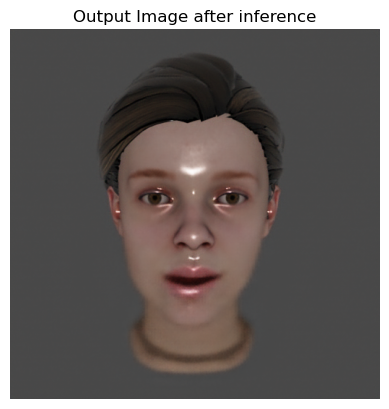

In [36]:
rig_param_values = [0, 0.2, -0.8, 0.0, 0.0, 0.0, 0.0, -2, 0.2, -0.3, 0.0, 0.0, 0.0, 0.0, -0.1, -0.01, -0.1, 0.0, 0.0, 0.0, 0.0, -0.1, 0.1, -4, 0.0, 0.0, 0.0, 0.0, 0.1, -0.03, -0.2, 0.0, 0.0, 0.0, 0.0, 0.02, 0.01, 0.16, 0.0, 0.0, 0.0, 0.0, -0.35, 0.14, -0.30, 0.0, 3.002625589942909e-06, -5.607937964668963e-06, 8.361090294783935e-06, -0.06107807159423828, 0.15036296844482422, -0.119140625, 0.0, 4.3709578676498495e-06, 7.03985597283463e-06, -8.000141860975418e-06, -0.22553014755249023, 0.1323099136352539, -0.433349609375, 0.0, -1.8065652511722874e-06, -5.944726581219584e-06, 0.0, -0.5, 0.5, 0.1, 0.0, 0.0, 0.0, 0.0, 0.01, -0.05, 0.16, 0.0, 0.0, 0.0, 0.0]

vae_evaluator = Inference(model, idle_img_path, device='cuda' if torch.cuda.is_available() else 'cpu')

vae_output = vae_evaluator.inference(rig_param_values)
vae_evaluator.inference_display_results(vae_output)

## Setup pre-trained DeepFace Emotion Classifier

In [39]:
from deepface import DeepFace
emotion_score = DeepFace.analyze(vae_output, actions = ['emotion'], enforce_detection = False)[0]['emotion']
print(emotion_score)

{'angry': 81.69310311161243, 'disgust': 0.0018426378651218054, 'fear': 0.05716839123745069, 'happy': 2.0122399017524835, 'sad': 2.993720971796397, 'surprise': 2.762674769738344, 'neutral': 10.479247810930275}


## Setup GAN

In [ ]:
generator = Generator(num_emotions=5, hidden_dim=128, output_dim=10).to(device)

In [ ]:
surrogate = SurrogateModel().to(device)

In [ ]:
num_samples = 100
emotions = torch.randint(0, 5, (num_samples,))  # Random integers for 5 emotion states
rig_params = torch.randn(num_samples, 10)  # Random rig parameters as target

emotion_labels = torch.nn.functional.one_hot(emotions, num_classes=5).float()

# Create a TensorDataset and DataLoader
dataset = TensorDataset(emotion_labels, rig_params)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)
